In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras_preprocessing.image import load_img, img_to_array
import numpy as np
from keras.applications import ResNet50

In [3]:
train_data_generation = ImageDataGenerator(rescale=1./255,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           horizontal_flip=True)
training_set = train_data_generation.flow_from_directory('/content/drive/MyDrive/autism/train',
                                                         target_size=(224, 224),
                                                         batch_size=32, class_mode='categorical'
                                                         )


Found 2526 images belonging to 2 classes.


In [4]:
test_data_generation = ImageDataGenerator(rescale=1./255)
testing_set = test_data_generation.flow_from_directory('/content/drive/MyDrive/autism/test',
                                                       target_size=(224, 224),
                                                       batch_size=32, class_mode='categorical'
                                                       )

Found 200 images belonging to 2 classes.


In [5]:
valid_data_generation = ImageDataGenerator(rescale=1./255)
valid_set = test_data_generation.flow_from_directory('/content/drive/MyDrive/autism/valid',
                                                       target_size=(224, 224),
                                                       batch_size=32, class_mode='categorical'
)

Found 200 images belonging to 2 classes.


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
base_model = ResNet50(include_top=False, weights="imagenet", input_shape=(input_size, input_size, input_channels))
x = Flatten()(base_model.output)
x = Dense(80, activation="softmax")(x)
model = Model(base_model.input, x)

for layer in base_model.layers:
    layer.trainable = False
model.save_weights("all_nontrainable.h5")

base_model = ResNet50(include_top=False, weights="imagenet", input_shape=(input_size, input_size, input_channels))
x = Flatten()(base_model.output)
x = Dense(80, activation="softmax")(x)
model = Model(base_model.input, x)

for layer in base_model.layers[:-26]:
    layer.trainable = False
model.load_weights("all_nontrainable.h5")

In [7]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False
for layer in pretrained_model.layers[:-20]:
    layer.trainable = False
resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(2, activation='softmax'))

94765736/94765736 [==============================] - 1s 0us/step


In [8]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrapp  (None, 2048)             0         
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 512)              1049088   
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 2)                1026      
 pper)                                                           
                                                                 
Total params: 24,637,826
Trainable params: 1,050,114
Non-trainable params: 23,587,712
____________________________________

In [ ]:
import torch.optim  as optim	
optimizer = optim.SGD(resnet_model.parameters(), lr=0.001)

AttributeError: ignored

In [9]:
resnet_model.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
epochs=20
history = resnet_model.fit(
  training_set,
  validation_data=valid_set,
  epochs=epochs
)

Epoch 1/20
79/79 [==============================] - 436s 5s/step - loss: 0.6482 - accuracy: 0.6196 - val_loss: 0.6468 - val_accuracy: 0.6250
Epoch 2/20
79/79 [==============================] - 415s 5s/step - loss: 0.6486 - accuracy: 0.6279 - val_loss: 0.6455 - val_accuracy: 0.6350
Epoch 3/20
79/79 [==============================] - 413s 5s/step - loss: 0.6345 - accuracy: 0.6437 - val_loss: 0.6514 - val_accuracy: 0.6100
Epoch 4/20
79/79 [==============================] - 414s 5s/step - loss: 0.6361 - accuracy: 0.6417 - val_loss: 0.6513 - val_accuracy: 0.6100
Epoch 5/20
79/79 [==============================] - 413s 5s/step - loss: 0.6388 - accuracy: 0.6318 - val_loss: 0.6427 - val_accuracy: 0.6400
Epoch 6/20
18/79 [=====>........................] - ETA: 4:53 - loss: 0.6190 - accuracy: 0.6620

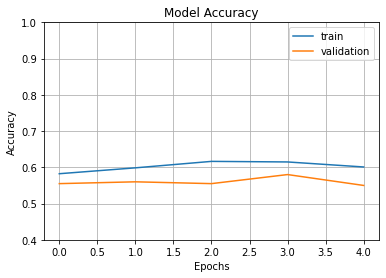

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
print(testing_set)
test=[]
for i in testing_set.labels:
  test.append(i)


In [ ]:
predictions=resnet_model.predict(testing_set)

7/7 [==============================] - 53s 9s/step


In [ ]:
y_pred=[]
for i in range(len(predictions)):
    if Y_pred[i][0]<0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [ ]:
print(test)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
print(accuracy_score(test,y_pred))

0.55


In [ ]:
from sklearn.metrics import accuracy_score